In [1]:
# loading necessaey libraries
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import visualkeras
import datetime

In [2]:
os.getcwd()

'C:\\Users\\Arockia'

In [3]:
# Data Directory
TRAINING_DIR = "C:/Users/Arockia/Face Mask Detection Data - Copy/train"
VALIDATION_DIR = "C:/Users/Arockia/Face Mask Detection Data - Copy/test"

In [4]:
#Data Generator

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1182 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
#save model
curr_dt_time = datetime.datetime.now()


model_name = 'model_facedetect' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{acc:.5f}-{val_loss:.5f}-{val_acc:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

In [6]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['train_loss','val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    


    axes[1].plot(history.history['acc'])   
    axes[1].plot(history.history['val_acc'])
    axes[1].legend(['train_accuracy','val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    
    plt.show()

In [7]:
# Model 2 with 2 layers
model_2 = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [8]:
from keras import optimizers
optimiser = optimizers.Adam(lr=0.0001)
model_2.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['acc'])

In [9]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [10]:
visualkeras.layered_view(model_2)

In [11]:
#train model_2 layer
history3 = model_2.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
119/119 [==============================] - 8s 64ms/step - loss: 0.5130 - acc: 0.7377 - val_loss: 0.2248 - val_acc: 0.9227
Epoch 2/25
119/119 [==============================] - 7s 59ms/step - loss: 0.3158 - acc: 0.8832 - val_loss: 0.1619 - val_acc: 0.9588
Epoch 3/25
119/119 [==============================] - 7s 59ms/step - loss: 0.2677 - acc: 0.9002 - val_loss: 0.1494 - val_acc: 0.9588
Epoch 4/25
119/119 [==============================] - 8s 65ms/step - loss: 0.2382 - acc: 0.9103 - val_loss: 0.1344 - val_acc: 0.9588
Epoch 5/25
119/119 [==============================] - 7s 60ms/step - loss: 0.2154 - acc: 0.9146 - val_loss: 0.1110 - val_acc: 0.9588
Epoch 6/25
119/119 [==============================] - 7s 57ms/step - loss: 0.2161 - acc: 0.9196 - val_loss: 0.1115 - val_acc: 0.9691
Epoch 7/25
119/119 [==============================] - 7s 58ms/step - loss: 0.2021 - acc: 0.9272 - val_loss: 0.0866 - val_acc: 

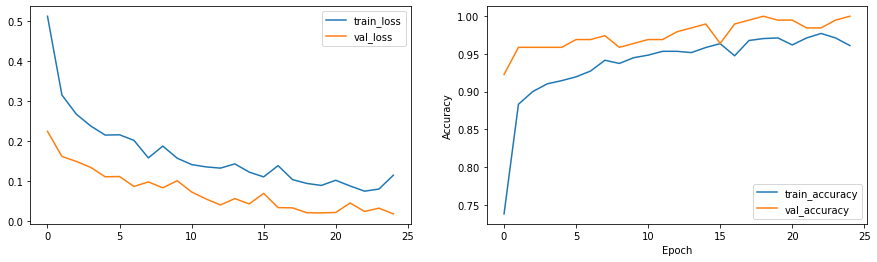

In [12]:
plot(history3)

In [13]:
# model with 3 layers

model1 = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 100)       90100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28900)            

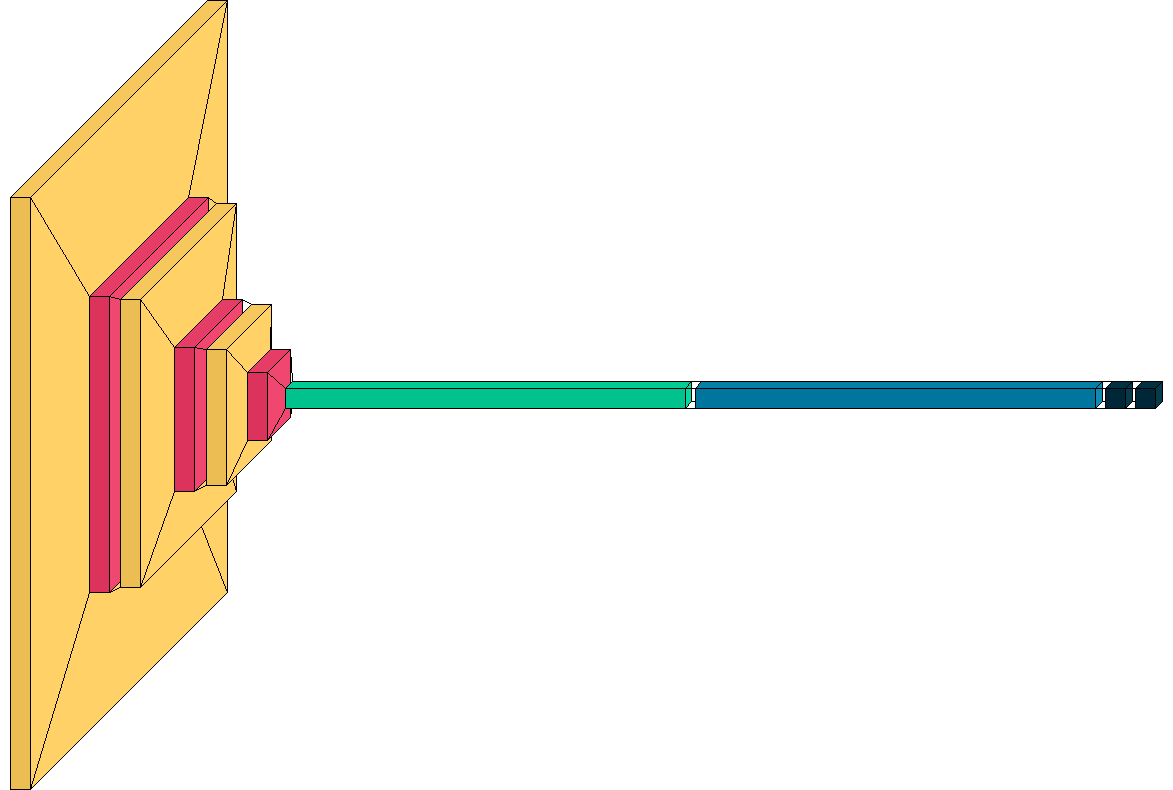

In [15]:
visualkeras.layered_view(model1)

In [16]:
#train model
history1 = model1.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
119/119 [==============================] - 7s 61ms/step - loss: 0.5290 - acc: 0.7250 - val_loss: 0.1679 - val_acc: 0.9330
Epoch 2/10
119/119 [==============================] - 7s 63ms/step - loss: 0.3166 - acc: 0.8832 - val_loss: 0.1136 - val_acc: 0.9691
Epoch 3/10
119/119 [==============================] - 7s 59ms/step - loss: 0.2508 - acc: 0.9112 - val_loss: 0.0854 - val_acc: 0.9588
Epoch 4/10
119/119 [==============================] - 7s 61ms/step - loss: 0.2068 - acc: 0.9188 - val_loss: 0.0404 - val_acc: 0.9845
Epoch 5/10
119/119 [==============================] - 7s 56ms/step - loss: 0.1990 - acc: 0.9289 - val_loss: 0.0915 - val_acc: 0.9433
Epoch 6/10
119/119 [==============================] - 7s 57ms/step - loss: 0.1597 - acc: 0.9382 - val_loss: 0.0908 - val_acc: 0.9639
Epoch 7/10
119/119 [==============================] - 7s 55ms/step - loss: 0.2161 - acc: 0.9239 - val_loss: 0.2487 - val_acc: 0.8763
Epoch 8/10
119/119 [==============================] - 7s 56ms/step - 

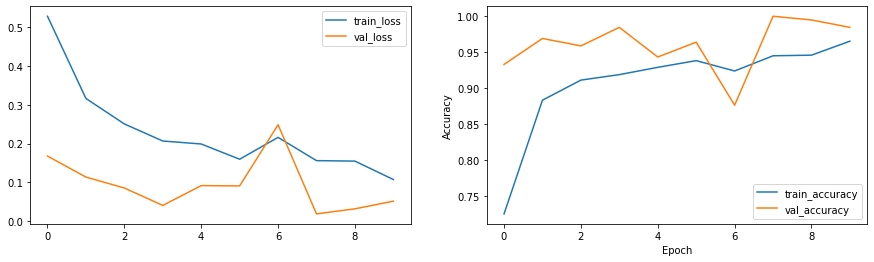

In [17]:
plot(history1)